### Project requirements/Details are Given below

In [ ]:
# Coding Project: digits generation in sequence

# The goal of this project is to write a program that can generate images
# representing sequences of numbers, for data augmentation purposes.
# seq of number 1 3 9 4 5 .... 
# seq of number 2 1 2 3 9 5 .... 

# Hence  input => image [1 3 9 4 5 6]  ==> class [1 3 9 4 5 6]
# Hence input => image [2 1 2 3 9 5 ]  ==> class [2 1 2 3 9 5]

# digits have to be stacked horizontally

# spacing uniform distribution over a range determined by two user specified numbers
# {that means it will take the best/optimal spacing automatically}

# The numerical values of the digits themselves are provided by the user [1 3 9 4 5 6]
# each digit chosen randomly from one of its representations in the MNIST dataset

#The width of the output image in pixels is specified by the user.
# {it will take the space from the user predefined space range before}

#while the height should be 28 pixels (i.e. identical to that of the MNIST digits).  The
#code should contain both an API and a script.

In [8]:
import os
from mlxtend.data import loadlocal_mnist
from random import choice
from PIL import Image
import numpy as np

### Handling dataset (Download + loading)

In [ ]:
#### Download data from  http://yann.lecun.com/exdb/mnist/ ###

In [2]:
# http://rasbt.github.io/mlxtend/user_guide/data/loadlocal_mnist/
# mlxtend-0.18.0
# return lebel and Image Map
def load_data(path, img_file, lbl_file):
    path_img = os.path.join(os.getcwd(), path, img_file)
    path_lbl = os.path.join(os.getcwd(), path, lbl_file)
    
    images, labels = loadlocal_mnist(
            images_path=path_img, 
            labels_path=path_lbl
    )
    # convering data to 32 bit floating point
    images = images.reshape(10000, 28, 28).astype('float32')
    
    return images, labels

In [3]:
## Load data API
x , y = load_data('MNIST-Sequence-master/data', 't10k-images.idx3-ubyte', 't10k-labels.idx1-ubyte')

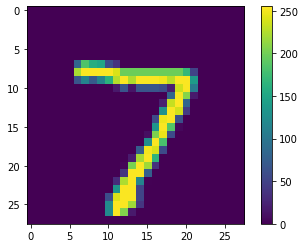

In [4]:
# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt
# Looking at the first Image in dataset
plt.imshow(x[0])
plt.colorbar()


### Mapping labels (class) position with values of class

In [5]:
def label_mapping(dataset_labels):
    # since we have 10 labels 0~9
    class_map = [[] for i in range(10)]
    
    # For i=0 it will be [[], [], [], [], [], [], [], [0], [], []]
    # Since dataset_labels[0] = 7 
    for i in range(len(dataset_labels)):
        class_map[dataset_labels[i]].append(i)
    
    return class_map

In [6]:
def generate_image(dataset_images, label_mapping, input_sequence, spacing, image_height=28):
    # generate a ndarray for space (image_height=28, space)  
    spacing = np.ones(image_height * spacing, dtype='float32').reshape(image_height, spacing)

    # find the index of the given class - label
    # We are choosing samples index randomly 
    label_index = choice(label_mapping[input_sequence[0]])
    
    # get the image mapping from dataset [28x28] matrix 
    image = dataset_images[label_index]
    
    # stacking one after another [28x28] + [28x5] = [28x33]
    whole_image = np.hstack((image, spacing))
    
    
    # Making an array like this: [28x33] + [28x33] + [28x33] + [28x28]
    sequence_length = len(input_sequence)
    for i in range(1, sequence_length):
        label_index = choice(label_mapping[input_sequence[i]])
        if i < sequence_length-1:
            dataset_image = dataset_images[label_index]
            temp_image = np.hstack((dataset_image, spacing))
            whole_image = np.hstack((whole_image, temp_image))
        else:
            dataset_image = dataset_images[label_index]
            whole_image = np.hstack((whole_image, dataset_image))
    
    return whole_image

In [66]:
# Define the parameters for the function
label_map = label_mapping(y) 
spacing = 10
dataset_images = x
image_height = 28

In [67]:
# generate a ndarray (image_height=28, space) to allocate pixel 
spacing = np.ones(image_height * spacing, dtype='float32').reshape(image_height, spacing)

# find the index of the given class - label
# We are choosing samples index randomly 
label_index = choice(label_map[input_sequence[0]])

# get the image mapping [28x28] matrix 
image = dataset_images[label_index]

# stacking one after another [28x28] + [28x space 5] = [28x33]
whole_image = np.hstack((image, spacing))

In [69]:
whole_image.shape

(28, 38)

In [9]:
input_sequence = [3, 8, 9, 1, 5]
whole_image_array = generate_image(x, label_mapping(y), input_sequence, 10)

In [10]:
whole_image_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

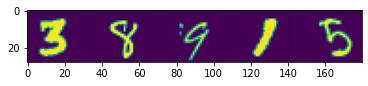

In [11]:
plt.imshow(whole_image_array)

In [47]:
def save_image(whole_image_array, input_sequence):
    img_name = "".join(list(map(str, input_sequence)))
    image = Image.fromarray(whole_image_array)
    if image.mode != 'RGB':
        image = image.convert('RGB')
    image.save(img_name + ".jpg")
    print(img_name + ".jpg" + ' saved')

In [21]:
num_samples = 10
seq_len = 5

In [31]:
def generate_random_sequence(num_samples, seq_len, dataset_images, label_mapping, spacing):
    inputs = []
    labels = []
    for i in range(num_samples):
        seq_values = np.random.randint(0, 10, seq_len)
        seq = generate_image(dataset_images, label_mapping, seq_values, spacing)
        inputs.append(seq)
        labels.append(seq_values)
    return np.array(inputs), np.array(labels)

In [34]:
num_samples = 7
seq_len = 5
dataset_images = x
label_idex_mapping = label_mapping(y)
spacing = 10

In [35]:
inputs, labels = generate_random_sequence(num_samples, seq_len, dataset_images, label_idex_mapping, spacing)

In [48]:
labels

array([[7, 2, 0, 5, 8],
       [3, 6, 3, 3, 7],
       [4, 8, 1, 0, 4],
       [8, 2, 6, 1, 9],
       [4, 3, 2, 6, 7],
       [5, 5, 2, 2, 0],
       [9, 2, 8, 5, 7]])

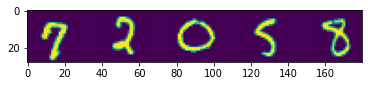

In [37]:
plt.imshow(inputs[0])

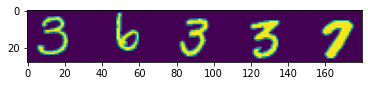

In [38]:
plt.imshow(inputs[1])

In [49]:
for i in range(num_samples):
    save_image(inputs[i], labels[i])

72058.jpg saved
36337.jpg saved
48104.jpg saved
82619.jpg saved
43267.jpg saved
55220.jpg saved
92857.jpg saved


In [67]:
# np.save('./pixel_mapping', inputs)
# np.save('./label_mapping', labels)
np.savez('generated_dataset', inputs, labels)

In [ ]:
np.load(os.path.join(os.getcwd(),'pixel_mapping.npy'))

In [68]:
def load_generated_data(path, dataset_name):
    dataset = os.path.join(path, dataset_name)
#     return np.load(px_file), np.load(lbl_file)
    return np.load(dataset)

In [69]:
generated_data = load_generated_data(os.getcwd(), 'generated_dataset.npz')

In [76]:
generated_data['arr_1']

array([[7, 2, 0, 5, 8],
       [3, 6, 3, 3, 7],
       [4, 8, 1, 0, 4],
       [8, 2, 6, 1, 9],
       [4, 3, 2, 6, 7],
       [5, 5, 2, 2, 0],
       [9, 2, 8, 5, 7]])

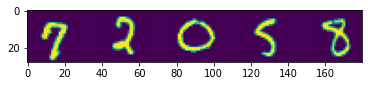

In [75]:
plt.imshow(generated_data['arr_0'][0])